In [1]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

cancer = pd.read_csv('WisconsinBreastCancerDatabase.csv').dropna()
cancer = cancer.replace(to_replace=['M', 'B'], value=[int(1), int(0)])
cancer

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The following Participation Activities may have slightly different values due to randomization. Students are encouraged to explore the analysis by changing the seed value, but should answer the PA questions using `seed=123`.

In [2]:
seed = 123

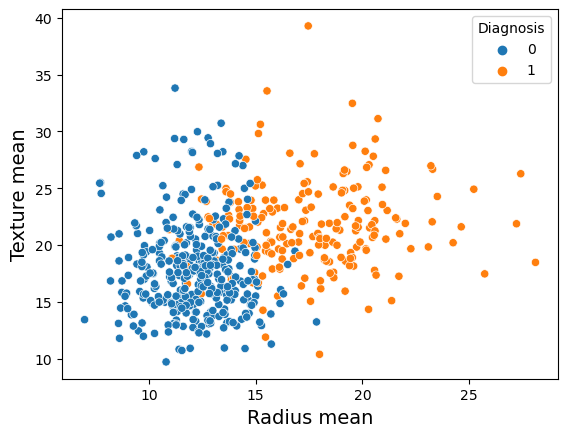

In [3]:
# Visual exploration
p = sns.scatterplot(data=cancer, x='Radius mean', y='Texture mean', hue='Diagnosis')
p.set_xlabel('Radius mean', fontsize=14)
p.set_ylabel('Texture mean', fontsize=14)
plt.show()

In [4]:
# Define input and output features
X = cancer[['Radius mean', 'Texture mean']]
y = cancer[['Diagnosis']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Fit k-nearest neighbors with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=3)

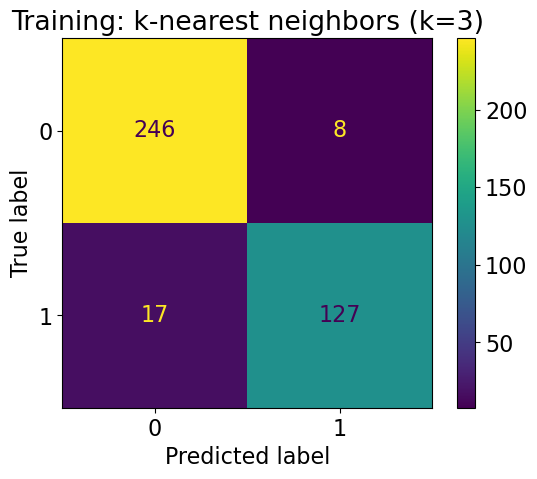

In [6]:
# Confusion matrix
y_pred = knn3.predict(X_train_scaled)

plt.rcParams.update({'font.size': 16})
cmTrain = confusion_matrix(y_train, y_pred)
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=knn3.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=3)")
plt.show()

In [7]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9371859296482412
Precision: 0.9407407407407408
Recall: 0.8819444444444444


In [8]:
# Fit k-nearest neighbors with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=7)

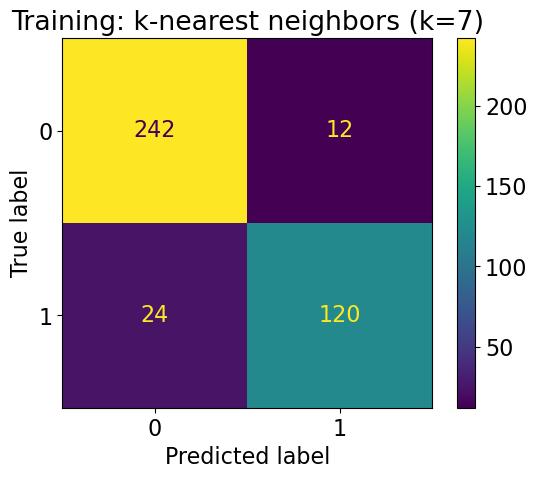

In [9]:
# Confusion matrix
y_pred = knn7.predict(X_train_scaled)

plt.rcParams.update({'font.size': 16})
cmTrain = confusion_matrix(y_train, y_pred)
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=knn7.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=7)")
plt.show()

In [10]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9095477386934674
Precision: 0.9090909090909091
Recall: 0.8333333333333334


In [11]:
# Fit k-nearest neighbors with k=11
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=11)

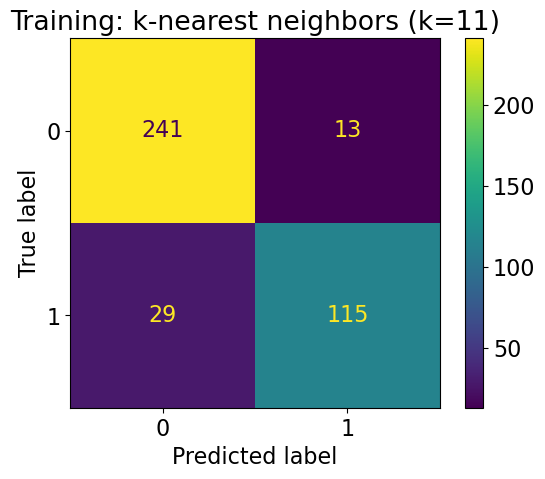

In [12]:
# Confusion matrix
y_pred = knn11.predict(X_train_scaled)

plt.rcParams.update({'font.size': 16})
cmTrain = confusion_matrix(y_train, y_pred)
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=knn11.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=11)")
plt.show()

In [13]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8944723618090452
Precision: 0.8984375
Recall: 0.7986111111111112
